# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()

In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT NOT NULL
)
''')


In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT NOT NULL
)
''')


In [5]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    villain_id INTEGER,
    outcome TEXT NOT NULL
)
''')

In [6]:
connection.commit()


In [7]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in database:", tables)


Tables in database: [('heroes',), ('sqlite_sequence',), ('villains',), ('battles',)]


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [8]:
import pandas as pd

In [9]:
url1 = "https://raw.githubusercontent.com/fourfeatherz/DS2002S25/main/python/heroes.csv"
df1 = pd.read_csv(url1)

In [10]:
url2 = "https://raw.githubusercontent.com/fourfeatherz/DS2002S25/main/python/villains.csv"
df2 = pd.read_csv(url2)

url3 = "https://raw.githubusercontent.com/fourfeatherz/DS2002S25/main/python/battles.csv"
df3 = pd.read_csv(url3)

In [11]:
df1.to_sql('heroes', connection, if_exists='replace', index = False)

cursor.execute('SELECT * FROM heroes')
rows = cursor.fetchall()

print('all heroes data:')
for row in rows:
  print(row)

all heroes data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')


In [12]:
df2.to_sql('villains', connection, if_exists='replace', index = False)

cursor.execute('SELECT * FROM villains')
rows2 = cursor.fetchall()

print('all villains data:')
for row in rows2:
  print(row)

all villains data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Red Skull', 'Revive Hydra')


In [13]:
df3.to_sql('battles', connection, if_exists='replace', index = False)

cursor.execute('SELECT * FROM battles')
rows3 = cursor.fetchall()

print('all battles data:')
for row in rows3:
  print(row)

all battles data:
(1, 1, 10, 'Villain Wins')
(2, 9, 3, 'Hero Wins')
(3, 8, 1, 'Draw')
(4, 5, 4, 'Villain Wins')
(5, 1, 7, 'Hero Wins')
(6, 2, 8, 'Villain Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(10, 3, 1, 'Draw')
(11, 1, 8, 'Villain Wins')
(12, 2, 1, 'Draw')
(13, 8, 9, 'Hero Wins')
(14, 8, 1, 'Draw')
(15, 6, 10, 'Draw')
(16, 1, 1, 'Villain Wins')
(17, 8, 3, 'Draw')
(18, 6, 3, 'Villain Wins')
(19, 4, 8, 'Villain Wins')
(20, 3, 4, 'Hero Wins')
(21, 8, 1, 'Draw')
(22, 4, 9, 'Draw')
(23, 3, 9, 'Draw')
(24, 8, 9, 'Villain Wins')
(25, 2, 5, 'Draw')
(26, 3, 7, 'Draw')
(27, 10, 3, 'Draw')
(28, 3, 8, 'Draw')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [14]:
cursor.execute('select name, power from heroes;')
heroes = cursor.fetchall()

print('superheroes and their powers')
for hero in heroes:
    print(hero)

superheroes and their powers
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [27]:
cursor.execute('''
    SELECT b.id AS battle_id, h.name AS hero_name, v.name AS villain_name, b.outcome
    FROM battles b
    JOIN heroes h ON b.hero_id = h.id
    JOIN villains v ON b.villain_id = v.id
    WHERE b.outcome = 'Hero Wins';
''')
hero_wins = cursor.fetchall()

print('battles where the hero won \n')
for battle in hero_wins:
    print(battle)

connection.close()

battles where the hero won 

(2, 'Hulk', 'Joker', 'Hero Wins')
(5, 'Spider-Man', 'Darkseid', 'Hero Wins')
(7, 'Hulk', 'Venom', 'Hero Wins')
(8, 'Batman', 'Thanos', 'Hero Wins')
(9, 'Black Panther', 'Loki', 'Hero Wins')
(13, 'The Flash', 'Magneto', 'Hero Wins')
(20, 'Batman', 'Lex Luthor', 'Hero Wins')
(29, 'Batman', 'Loki', 'Hero Wins')
(30, 'Thor', 'Loki', 'Hero Wins')


In [28]:
connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()

cursor.execute('select name, evil_plan from villains;')
villains = cursor.fetchall()

print('villains and their evil plans \n')
for villain in villains:
    print(villain)

villains and their evil plans 

('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')


In [32]:
cursor.execute('''
    SELECT heroes.name, COUNT(battles.id)
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY heroes.id, heroes.name
    ORDER BY COUNT(battles.id) DESC
    LIMIT 1;
''')
most_battles = cursor.fetchone()

print('hero who fought the most battles \n')
print(most_battles)

connection.close()

hero who fought the most battles 

('Batman', 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [33]:
connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS hero_identity (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER NOT NULL,
    real_name TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes(id) ON DELETE CASCADE
)
''')

In [34]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in database:", tables)

Tables in database: [('sqlite_sequence',), ('heroes',), ('villains',), ('battles',), ('hero_identity',)]


In [35]:
cursor.executemany('''
    INSERT INTO hero_identity (hero_id, real_name) VALUES (?, ?)
''', [
    (1, 'Peter Parker'),
    (2, 'Tony Stark'),
    (3, 'Bruce Wayne'),
    (4, 'Clark Kent'),
    (5, 'Thor Odinson'),
    (6, 'Diana Prince'),
    (7, 'King T’Challa'),
    (8, 'Barry Allen'),
    (9, 'Bruce Banner'),
    (10, 'Stephen Strange')
])

connection.commit()

In [36]:
cursor.execute('SELECT * FROM hero_identity')
rows4 = cursor.fetchall()

print('all heroes real identities:')
for row in rows4:
  print(row)

all heroes real identities:
(1, 1, 'Peter Parker')
(2, 2, 'Tony Stark')
(3, 3, 'Bruce Wayne')
(4, 4, 'Clark Kent')
(5, 5, 'Thor Odinson')
(6, 6, 'Diana Prince')
(7, 7, 'King T’Challa')
(8, 8, 'Barry Allen')
(9, 9, 'Bruce Banner')
(10, 10, 'Stephen Strange')


In [39]:
cursor.execute('''
    SELECT heroes.name, hero_identity.real_name
    FROM hero_identity
    JOIN heroes ON hero_identity.hero_id = heroes.id;
''')
print('superheroes and their real identities \n')
for row in cursor.fetchall():
    print(row)
#shows all superheroes and their civilain names -- allows us to see who does and does not use an alias

superheroes and their real identities 

('Spider-Man', 'Peter Parker')
('Iron Man', 'Tony Stark')
('Batman', 'Bruce Wayne')
('Superman', 'Clark Kent')
('Thor', 'Thor Odinson')
('Wonder Woman', 'Diana Prince')
('Black Panther', 'King T’Challa')
('The Flash', 'Barry Allen')
('Hulk', 'Bruce Banner')
('Doctor Strange', 'Stephen Strange')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

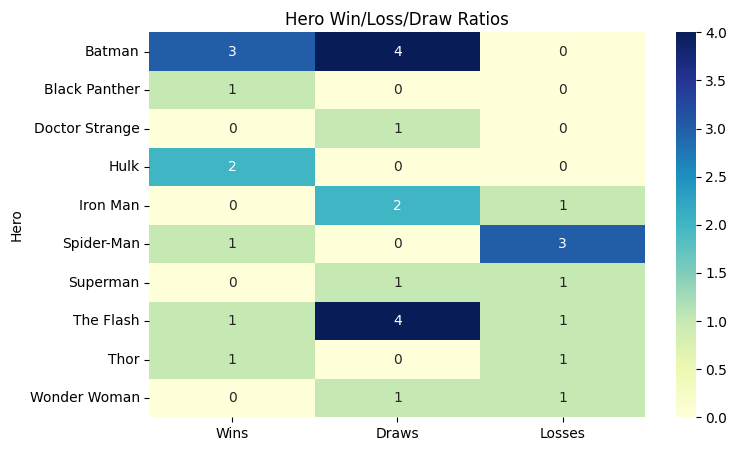

In [77]:
cursor.execute('''
    SELECT heroes.name,
           SUM(CASE WHEN battles.outcome = 'Hero Wins' THEN 1 ELSE 0 END) AS Wins,
           SUM(CASE WHEN battles.outcome = 'Draw' THEN 1 ELSE 0 END) AS Draws,
           SUM(CASE WHEN battles.outcome = 'Villain Wins' THEN 1 ELSE 0 END) AS Losses
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY heroes.name;
''')

df = pd.DataFrame(cursor.fetchall(), columns=['Hero', 'Wins', 'Draws', 'Losses'])
df.set_index('Hero', inplace=True)

plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Hero Win/Loss/Draw Ratios")
plt.show()

In [78]:
df

,Wins,Draws,Losses
Hero,,,
Batman,3,4,0
Black Panther,1,0,0
Doctor Strange,0,1,0
Hulk,2,0,0
Iron Man,0,2,1
Spider-Man,1,0,3
Superman,0,1,1
The Flash,1,4,1
Thor,1,0,1


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!